# A. Importing and cleaning the data & B. Manipulating the data
 thoroughly clean the data:
 - dealing with missing values, 
 - normalizing entries and text data, 
 - dealing with duplicates or incorrect values, getting certain data in more useful formats and so on

In [272]:
import pandas as pd

In [273]:
data = pd.read_csv("./en.openfoodfacts.org.products.tsv",sep='\t')

//anaconda/envs/exts-ada/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [274]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
#finding out about data types, number of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [276]:
#how many missing values
data.isnull().sum().head(10)

code                          26
url                           26
creator                        3
created_t                      3
created_datetime              10
last_modified_t                0
last_modified_datetime         0
product_name               17512
generic_name              298313
quantity                  236742
dtype: int64

To understand how to clean this data, given that there are so many missing values in certain columns (e.g. purchase_places 289462/356027 entries), I need to understand what columns will be used in this task. To come up with questions I am interested in, first I need to look at all the columns that are available in the data set.

In [277]:
for i in data.columns:
    print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

I'll be interested in:
- product_name
- categories_en
- packaging
- countries_en
- origins
- manufacturing_places
- carbon-footprint_100g

And then to solve your task also those:
- carbohydrates_100g
- fat_100g
- proteins_100g

In [278]:
#keep only interesting data
keep_columns = ['product_name','categories_en','packaging','countries_en','origins', 'manufacturing_places',
                'carbon-footprint_100g', 'carbohydrates_100g', 'fat_100g', 'proteins_100g']

In [279]:
dt = data[keep_columns]

In [280]:
dt.head(2)

,product_name,categories_en,packaging,countries_en,origins,manufacturing_places,carbon-footprint_100g,carbohydrates_100g,fat_100g,proteins_100g
0,Farine de blé noir,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,United States,NaN,NaN,NaN,64.29,28.57,3.57


In [281]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 10 columns):
product_name             338515 non-null object
categories_en            103301 non-null object
packaging                89960 non-null object
countries_en             355752 non-null object
origins                  25050 non-null object
manufacturing_places     42008 non-null object
carbon-footprint_100g    278 non-null float64
carbohydrates_100g       279220 non-null float64
fat_100g                 279497 non-null float64
proteins_100g            294161 non-null float64
dtypes: float64(4), object(6)
memory usage: 27.2+ MB


There are too many differences in the number of nans between the columns, hence I will be cleaning the data on the question basis. But I can drop the duplicates.

In [282]:
dt.duplicated().sum()

42172

In [283]:
dt.drop_duplicates(inplace=True)

//anaconda/envs/exts-ada/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
dt.duplicated().sum()

0

## Questions
---------------------


### 1. Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats). 
- What are the foods that have the highest ratios of each macronutrient?  
- What is the macronutrient breakdown across different countries, etc.
----

__What are the foods that have the highest ratios of each macronutrient?__

In [285]:
filt = ~dt['categories_en'].isnull()

In [286]:
dt[filt].sort_values('carbohydrates_100g', ascending=False)['categories_en'][:10]
#dt['fat_100g']
#dt['proteins_100g']

281780    Plant-based foods and beverages,Plant-based fo...
311656             Sugary snacks,Chocolates,Dark chocolates
352368    Plant-based foods and beverages,Plant-based fo...
112519               Groceries,Sauces,Tomato sauces,Ketchup
251076            Sugary snacks,Biscuits and cakes,Biscuits
256837    Spreads,Breakfasts,Sweet spreads,Sweeteners,Sy...
210260         Sweeteners,Syrups,Simple syrups,Agave syrups
284493         Sweeteners,Syrups,Simple syrups,Agave syrups
284509         Sweeteners,Syrups,Simple syrups,Agave syrups
289838         Sweeteners,Syrups,Simple syrups,Agave syrups
Name: categories_en, dtype: object

In [287]:
dt[filt].sort_values('proteins_100g', ascending=False)['categories_en'][:10]

333905    Plant-based foods and beverages,Plant-based fo...
259638    Sugary snacks,Desserts,Chocolates,Chocolate de...
178692                                      Plastic-surgery
310541    Beverages,Alcoholic beverages,Hard liquors,fr:...
229675    Plant-based foods and beverages,Plant-based fo...
223142    Plant-based foods and beverages,Plant-based fo...
303053    Plant-based foods and beverages,Plant-based fo...
572       Dietary supplements,Bodybuilding supplements,P...
306       Dietary supplements,Bodybuilding supplements,P...
20759     Dietary supplements,Bodybuilding supplements,P...
Name: categories_en, dtype: object

In [288]:
dt[filt].sort_values('fat_100g', ascending=False)['categories_en'][:10]

178692                                      Plastic-surgery
336897    Plant-based foods and beverages,Plant-based fo...
334384    Plant-based foods and beverages,Plant-based fo...
228928                    Fats,Animal fats,fr:Gras de boeuf
228813    Plant-based foods and beverages,Plant-based fo...
228814    Plant-based foods and beverages,Plant-based fo...
228815    Plant-based foods and beverages,Plant-based fo...
228818    Plant-based foods and beverages,Plant-based fo...
228821    Plant-based foods and beverages,Plant-based fo...
228822    Plant-based foods and beverages,Plant-based fo...
Name: categories_en, dtype: object

__What is the macronutrient breakdown across different countries__

In [289]:
grouped = dt[filt].groupby("countries_en")

In [290]:
grouped.mean()

,carbon-footprint_100g,carbohydrates_100g,fat_100g,proteins_100g
countries_en,,,,
Albania,NaN,63.000000,15.000000,14.000000
"Albania,Denmark,Italy",NaN,15.300000,0.800000,7.500000
"Albania,France",NaN,66.000000,11.000000,7.500000
"Albania,Italy",NaN,42.087500,7.600000,10.787500
Algeria,NaN,42.933333,15.833333,6.100000
"Algeria,Australia,Bahrain,Egypt,Iraq,Jordan,Kuwait,Lebanon,Libya,Morocco,Nigeria,Oman,Qatar,Saudi Arabia,South Africa,State of Palestine,Tunisia,United Arab Emirates,United States,Yemen",NaN,57.000000,27.100000,9.200000
"Algeria,Belgium,Brazil,Cameroon,Canada,France,Germany,India,Italy,Luxembourg,Mali,Martinique,Morocco,Netherlands,Portugal,Réunion,Saudi Arabia,Senegal,Spain,Switzerland,United Kingdom,United States",NaN,10.600000,0.000000,0.000000
"Algeria,Belgium,Canada,France,Germany,Italy,Mali,Martinique,Spain,Switzerland",NaN,57.600000,31.600000,6.000000
"Algeria,Belgium,Canada,France,Morocco,Switzerland",NaN,4.800000,1.600000,3.200000


### 2. Which foods have the highest carbon footprint? Which countries manufacture food, which has the highest carbon footprint? Where is most of the food manufactured?
-------

In [291]:
filt = ~dt['carbon-footprint_100g'].isnull()

In [292]:
#how many countries among those are still nan
dt[filt].isnull().sum()

product_name               1
categories_en              4
packaging                 11
countries_en               1
origins                  131
manufacturing_places      93
carbon-footprint_100g      0
carbohydrates_100g        33
fat_100g                  32
proteins_100g             30
dtype: int64

__foods with highest carbon footprint__

In [293]:
foods = dt[filt].groupby(['categories_en'])

In [294]:
dt2 = foods['carbon-footprint_100g'].apply(max).sort_values(ascending=False)

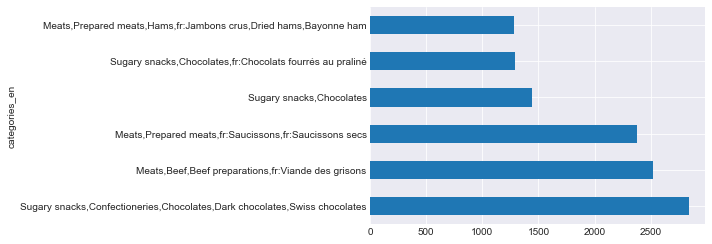

In [295]:
%matplotlib inline
dt2[:6].plot(kind='barh')

In [296]:
#Which countries manufacture food, which has the highest carbon footprint
dt[filt].groupby(['countries_en']).size()

countries_en
Belgium,France                    1
Belgium,France,Switzerland        1
Brazil                            1
France                          176
France,Germany,Switzerland        1
France,Guadeloupe                 1
France,Hong Kong                  1
France,Switzerland                3
France,fr:Puyricard               1
French Guiana                     1
Italy                             2
Spain                             8
Sweden                            1
Switzerland                      74
Tunisia                           1
United Kingdom,United States      1
United States                     1
World                             1
中华人民共和国                           1
dtype: int64

As seen above, there are too few records from most countries to answer that question in an unbiased fashion. I can compare mean carbon footprint of France and Switzerland.

In [297]:
FR = dt[filt]['countries_en'] == 'France'
CH = dt[filt]['countries_en'] == 'Switzerland'

dt[filt&FR]['carbon-footprint_100g'].mean() > dt[filt&CH]['carbon-footprint_100g'].mean()

False

Mean carbon footprint of Swiss products > of French products in the dataset.

__Where is most of the food manufactured?__

In [298]:
dt['manufacturing_places'].isnull().sum()/len(dt)


0.86671552149878128

87% of the records do not report manufacturing places.

In [299]:
filt = ~dt['manufacturing_places'].isnull()

In [300]:
x = dt[filt]['countries_en'].str.cat(sep=', ')

In [301]:
#each product may be manufactured in many places, hence I save all records for counting
countries = x.split(',')

In [302]:
import numpy as np
countries = np.array((countries))

In [303]:
#counting procedure for countries
countries = pd.DataFrame(countries)

In [304]:
countries['count'] = 1

In [305]:
countries.head()

,0,count
0,Canada,1
1,Canada,1
2,United Kingdom,1
3,Canada,1
4,Canada,1


In [306]:
country = countries.groupby(0).sum().sort_values("count", ascending = False)

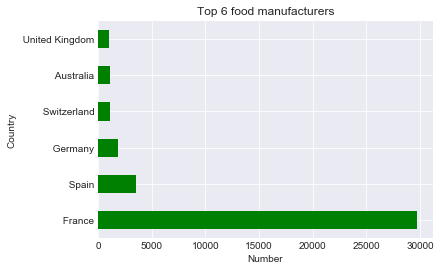

In [307]:
import matplotlib.pyplot as plt
country[:6].plot(kind='barh', title="Top 6 food manufacturers", color="green")
plt.xlabel("Number")
plt.ylabel("Country")
plt.legend([])
plt.show()

### 3.  How is the world's food packaged? Which countries package most of their food in plastic? What is the most common packaging in Switzerland?
--------------

In [308]:
#part of the data that is null
data['packaging'].isnull().sum()/len(data['packaging'])

0.7473225345268758

In [309]:
dtx = data['packaging'].dropna()

In [310]:
x = dtx.str.cat(sep=', ')

In [311]:
pack = x.split(',')

In [312]:
pack = np.array(pack)

In [313]:
pack = pd.DataFrame(pack)

In [314]:
pack['count'] = 1

In [315]:
pack.head()

,0,count
0,plastique,1
1,Frais,1
2,Frais,1
3,Paper,1
4,plastic film,1


In [316]:
pack.groupby(0).sum().sort_values('count', ascending=False).index[:20]

Index(['Plastique', 'plastique', ' Carton', 'Carton', ' Sachet', 'Verre',
       ' Frais', ' Plastique', ' Bouteille', ' Barquette', 'Frais', 'Métal',
       ' Bocal', ' carton', ' Conserve', ' Boîte',
       'Sous atmosphère protectrice', ' sachet', 'carton', ' Kunststoff'],
      dtype='object', name=0)

In [317]:
#notice Kunststoff = Plastique=Plastique = Plastic; Carton=carton
pack['common'] = pack[0].map({'plastique':'Plastic', 'Plastique':'Plastic', ' Kunststoff':'Plastic', 
            ' Carton': 'Carton', ' carton':'Carton', 'Métal': "Metal", 'metal': "Metal", " Metal": "Metal"})

In [318]:
most = pack.groupby('common').sum().sort_values('count', ascending=False).head()

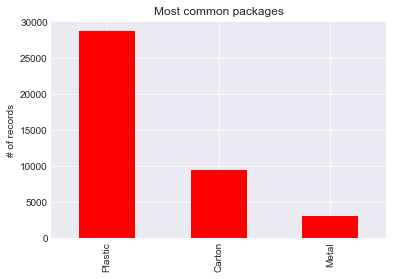

In [319]:
most.plot(kind='bar', color='red', title='Most common packages')
plt.xlabel(" ")
plt.ylabel("# of records")
plt.legend([])

__Which countries package most of their food in plastic?__

In [320]:
filt = ~dt['packaging'].isnull()

In [321]:
(dt[filt]['packaging'] =="Plastique").sum()

2118

In [322]:
(dt[filt]['packaging'] =="Plastic").sum()

947

In [323]:
(dt[filt]['packaging'] =="plastic").sum()

246

In [324]:
(dt[filt]['packaging'] =="Kunststoff").sum()

1397

In [325]:
plastic = ((dt[filt]['packaging'] =="Plastique") | (dt[filt]['packaging'] =="Plastc") |
           (dt[filt]['packaging'] =="plastic") | (dt[filt]['packaging'] =="Kunststoff"))

In [326]:
dt['count'] = 1

//anaconda/envs/exts-ada/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [327]:
plastic_lovers = dt[filt & plastic].groupby("countries_en").sum().sort_values('count', ascending=False)['count'][:5]

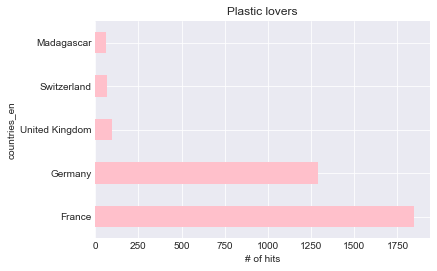

In [328]:
plastic_lovers.plot(kind='barh', color='pink', title="Plastic lovers")
plt.xlabel("# of hits")

__What is the most common packaging in Switzerland?__

In [329]:
grouped = dt[filt].groupby("countries_en")

In [330]:
CH = grouped.get_group("Switzerland")

In [331]:
CH.groupby('packaging').sum().sort_values('count', ascending=False)['count'][:10]

packaging
Carton                        75
Plastique                     68
Barquette plastique           55
Frais,Plastique               53
Sachet,Plastique              51
packung                       36
Sachet plastique              32
Carton,barquette plastique    31
plastique                     24
Carton/plastique              23
Name: count, dtype: int64

# C. Text data

In [332]:
ingredients = data['ingredients_text'].dropna()

In [333]:
x = ingredients.str.cat(sep=', ')
ing = x.split(',')
ing = pd.DataFrame(ing)

In [334]:
ing['count'] = 1

In [335]:
ing.head()

,0,count
0,Bananas,1
1,vegetable oil (coconut oil,1
2,corn oil and/or palm oil) sugar,1
3,natural banana flavor.,1
4,Peanuts,1


In [336]:
ing.groupby(0).sum().sort_values('count', ascending=False).head()

,count
0,
salt,82543
sugar,52261
water,48434
sel,39887
sucre,28386


-------> salt, sugar and water are the most common ingredients

# C. Time-series analysis

*created_datetime* and *last_modified_datetime*. 

First, you will analyze the mean time difference between these two values. And then, you will analyze the mean number of created items per month over the timeline of the data. You will finally choose an appropriate method to visualize these findings.

In [337]:
df = pd.DataFrame(data['created_datetime'])

In [338]:
df['last_modified_datetime'] = data['last_modified_datetime']

In [339]:
df.head()

,created_datetime,last_modified_datetime
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 2 columns):
created_datetime          356017 non-null object
last_modified_datetime    356027 non-null object
dtypes: object(2)
memory usage: 5.4+ MB


In [341]:
df = pd.DataFrame(data=df, dtype=str)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 2 columns):
created_datetime          356027 non-null object
last_modified_datetime    356027 non-null object
dtypes: object(2)
memory usage: 5.4+ MB


In [343]:
df.head()

,created_datetime,last_modified_datetime
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z


In [344]:
df.created_datetime = df.created_datetime.str.replace('T', ' ').str.replace('Z', '')

In [345]:
df.last_modified_datetime = df.last_modified_datetime.str.replace('T', ' ').str.replace('Z', '')

In [346]:
df.head()

,created_datetime,last_modified_datetime
0,2016-09-17 09:17:46,2016-09-17 09:18:13
1,2017-03-09 14:32:37,2017-03-09 14:32:37
2,2017-03-09 14:32:37,2017-03-09 14:32:37
3,2017-03-09 10:35:31,2017-03-09 10:35:31
4,2017-03-09 10:34:13,2017-03-09 10:34:13


In [347]:
type(df.loc[0,'created_datetime'])

str

In [348]:
df.created_datetime = pd.to_datetime(df.created_datetime, format="%Y-%m-%d %H:%M:%S", errors='coerce') 
#drop entries that don't match the pattern

In [349]:
df.last_modified_datetime = pd.to_datetime(df.last_modified_datetime, format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 2 columns):
created_datetime          356000 non-null datetime64[ns]
last_modified_datetime    356001 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 5.4 MB


In [351]:
df.dropna(inplace=True)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356000 entries, 0 to 356026
Data columns (total 2 columns):
created_datetime          356000 non-null datetime64[ns]
last_modified_datetime    356000 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.1 MB


In [353]:
df.head()

,created_datetime,last_modified_datetime
0,2016-09-17 09:17:46,2016-09-17 09:18:13
1,2017-03-09 14:32:37,2017-03-09 14:32:37
2,2017-03-09 14:32:37,2017-03-09 14:32:37
3,2017-03-09 10:35:31,2017-03-09 10:35:31
4,2017-03-09 10:34:13,2017-03-09 10:34:13


In [354]:
#the mean time difference between these two values
abs(df.created_datetime-df.last_modified_datetime).mean()

Timedelta('108 days 03:35:07.638426')

Analyze the mean number of created items per month over the timeline of the data. 

In [355]:
#accessing only months of all entries
month = df['created_datetime'].dt.month

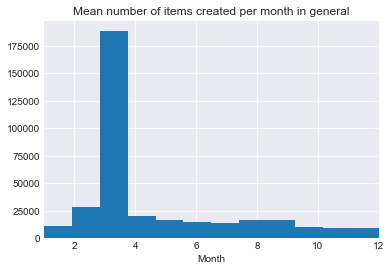

In [356]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('darkgrid')
month.hist(bins=12)
plt.xlabel("Month")
plt.xlim(1,12)
plt.title("Mean number of items created per month in general")

In [357]:
df.created_datetime = pd.to_datetime(df.created_datetime)

In [358]:
df.last_modified_datetime = pd.to_datetime(df.last_modified_datetime)

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356000 entries, 0 to 356026
Data columns (total 2 columns):
created_datetime          356000 non-null datetime64[ns]
last_modified_datetime    356000 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 18.1 MB


In [360]:
df['count']=1

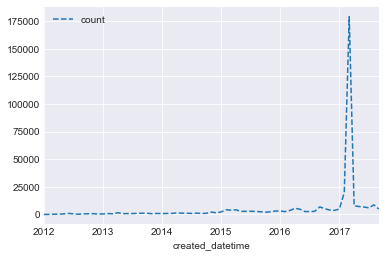

In [361]:
df.resample('M', on='created_datetime').sum().plot(style='--')

# D. Build a database
You will build a database to hold your data. It is up to you to define appropriate tables and well as primary keys for connecting them. (The focus is definitely more on just using the basic methods/tools introduced in the course and not on building a complex database.) In particular you can follow the following list of steps:

restrict your data to 1000 entries and 5 columns of your choice
create a connection to an sqlite3 database
create one or multiple tables, at least one of the tables should have a PRIMARY KEY
fill the database with your data
run at least one query to demonstrate that it works correctly

In [362]:
import sqlite3 as sq

In [363]:
db = sq.connect('foods.db')

In [364]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313855 entries, 0 to 356026
Data columns (total 11 columns):
product_name             310021 non-null object
categories_en            102289 non-null object
packaging                89469 non-null object
countries_en             313625 non-null object
origins                  24911 non-null object
manufacturing_places     41832 non-null object
carbon-footprint_100g    278 non-null float64
carbohydrates_100g       251757 non-null float64
fat_100g                 252032 non-null float64
proteins_100g            266561 non-null float64
count                    313855 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 38.7+ MB


In [365]:
#remove rows which have more than 10 NaN entries
dt.dropna(thresh=10, axis=0, inplace=True)

//anaconda/envs/exts-ada/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [366]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10566 entries, 176 to 355966
Data columns (total 11 columns):
product_name             10566 non-null object
categories_en            10565 non-null object
packaging                10566 non-null object
countries_en             10566 non-null object
origins                  10488 non-null object
manufacturing_places     10528 non-null object
carbon-footprint_100g    197 non-null float64
carbohydrates_100g       10566 non-null float64
fat_100g                 10566 non-null float64
proteins_100g            10566 non-null float64
count                    10566 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 990.6+ KB


In [369]:
#make sure product names are unique
dt.drop_duplicates(['product_name'], inplace=True)

//anaconda/envs/exts-ada/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [370]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9620 entries, 176 to 355966
Data columns (total 11 columns):
product_name             9620 non-null object
categories_en            9619 non-null object
packaging                9620 non-null object
countries_en             9620 non-null object
origins                  9547 non-null object
manufacturing_places     9585 non-null object
carbon-footprint_100g    176 non-null float64
carbohydrates_100g       9620 non-null float64
fat_100g                 9620 non-null float64
proteins_100g            9620 non-null float64
count                    9620 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 901.9+ KB


In [371]:
to_db = dt[:1000]

In [372]:
to_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 176 to 185535
Data columns (total 11 columns):
product_name             1000 non-null object
categories_en            999 non-null object
packaging                1000 non-null object
countries_en             1000 non-null object
origins                  995 non-null object
manufacturing_places     1000 non-null object
carbon-footprint_100g    10 non-null float64
carbohydrates_100g       1000 non-null float64
fat_100g                 1000 non-null float64
proteins_100g            1000 non-null float64
count                    1000 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 93.8+ KB


In [373]:
def run_query(query):
    return pd.read_sql_query(query,db)

In [374]:
cur = db.cursor()

In [375]:
to_db.head(2)

,product_name,categories_en,packaging,countries_en,origins,manufacturing_places,carbon-footprint_100g,carbohydrates_100g,fat_100g,proteins_100g,count
176,Salade Cesar,"Plant-based foods and beverages,Plant-based fo...",Frais,Canada,Québec,Brossard Québec,NaN,23.0,12.0,22.00,1
177,Danoises à la cannelle roulées,"Sugary snacks,Biscuits and cakes,Pastries",Frais,Canada,Québec,Brossard Québec,NaN,54.1,14.4,4.79,1


In [376]:
to_db.columns = ['product_name', 'categories_en', 'packaging', 'countries_en', 'origins',
       'manufacturing_places', "carbon_footprint_100g", 'carbohydrates_100g',
       'fat_100g', 'proteins_100g', 'count']

In [377]:
query= """CREATE TABLE project_data (product_name TEXT PRIMARY KEY, categories_en TEXT, packaging TEXT, 
countries_en TEXT, origins TEXT, manufacturing_places TEXT, carbon_footprint_100g FLOAT,
carbohydrates_100g FLOAT, fat_100g FLOAT, proteins_100g FLOAT, count INTEGER);"""


In [378]:
cur.execute(query)

OperationalError: table project_data already exists

In [379]:
to_db.to_sql(name='project_data', con=db, if_exists='append', index=False)

In [382]:
#testing
cursor.execute("SELECT * FROM project_data;")
results = cursor.fetchall()
print(results[:10])

[('Salade Cesar', 'Plant-based foods and beverages,Plant-based foods,Fresh foods,Fruits and vegetables based foods,Fresh plant-based foods,Vegetables based foods,Fresh vegetables,Leaf vegetables', 'Frais', 'Canada', 'Québec', 'Brossard Québec', None, 23.0, 12.0, 22.0, 1), ('Danoises à la cannelle roulées', 'Sugary snacks,Biscuits and cakes,Pastries', 'Frais', 'Canada', 'Québec', 'Brossard Québec', None, 54.1, 14.4, 4.79, 1), ('Chaussons tressés aux pommes', 'Sugary snacks,Biscuits and cakes,Pastries', 'Frais', 'Canada', 'Québec', 'Brossard Québec', None, 38.7, 10.7, 3.33, 1), ('Pain Burger Artisan', 'fr:Boulange', 'Frais,plastique', 'Canada', 'Québec', 'Brossard,Québec', None, 53.3, 1.11, 10.0, 1), ('Quiche Lorraine', 'Meals,Pizzas pies and quiches,Quiches,fr:Quiches lorraines', 'Frai', 'Canada', 'Québec', 'Brossard,Québec', None, 7.86, 6.79, 5.36, 1), ('Pâté au poulet', 'Meats,Poultries,Chickens,Cooked chicken', 'Frais', 'Canada', 'Québec', 'Brossard Québec', None, 16.6, 10.2, 33.9, 1

# F. Finding correlations
You will try to find correlations between the different data fields. Your goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

In [384]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

I choose the following data fields for the experiment:
- additives_n
- saturated-fat_100g
- omega-3-fat_100g
- trans-fat_100g
- sugars_100g
- cholesterol_100g
- fiber_100g
- proteins_100g
- fruits-vegetables-nuts_100g
- caffeine_100g
- taurine_100g

and will calculate the correlation between the nutrition score and each of them.

In [388]:
data['nutrition-score-uk_100g'].max()

40.0

In [392]:
keep_columns = ['nutrition-score-uk_100g', "additives_n", "saturated-fat_100g", "omega-3-fat_100g",
                "trans-fat_100g", "sugars_100g", "cholesterol_100g", "fiber_100g", "proteins_100g",
                "fruits-vegetables-nuts_100g", "caffeine_100g","taurine_100g"]
dt = data[keep_columns]

In [400]:
dt.dropna(thresh=8, axis=0, inplace=True)

//anaconda/envs/exts-ada/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [403]:
dt['nutrition-score-uk_100g'].corr(dt['additives_n'])

0.15614832229327041

In [407]:
#correlation between two columns df['X'].corr(df['Y'])
for i in keep_columns[1:]:
    corr = dt['nutrition-score-uk_100g'].corr(dt[i])
    print("Correlation with %s: %f" %(i,corr))

Correlation with additives_n: 0.156148
Correlation with saturated-fat_100g: 0.662242
Correlation with omega-3-fat_100g: 0.251718
Correlation with trans-fat_100g: 0.021225
Correlation with sugars_100g: 0.475982
Correlation with cholesterol_100g: 0.035422
Correlation with fiber_100g: -0.163036
Correlation with proteins_100g: 0.118168
Correlation with fruits-vegetables-nuts_100g: -0.094698
Correlation with caffeine_100g: 0.330392
Correlation with taurine_100g: -0.559017


To conclude, high nutrition score is caused by saturated fats, sugars; low nutritions score by taurine, a bit by caffeine; proteins, additives, omega-3, trans-fat, cholesterol, fiber, or fruit content are not correlated.